# “finally” block

* It is not recommended to maintain clean-up code (**resource deallocating code** OR **resource releasing code**) inside the `try` block because there is no guarantee for the execution of every statement inside the `try` block always.
* It is not recommended to maintain clean-up code inside `except` block, because if there is no exception then `except` block won't be executed.
* Hence we required someplace to maintain clean-up code which should be executed- always irrespective of whether an exception was raised or not raised and whether the exception was handled or not handled. Such type of best place is nothing but `finally` block.
* Hence the main purpose of the **“`finally`”** block is to maintain clean-up code.
* The specialty of the **“`finally`”** block is it will be executed always whether the exception is raised or not raised and whether the exception is handled or not handled.

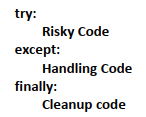

**Case-1:** If there is no exception

In [1]:
try:
  print("try")
except:
  print("except")
finally:
  print("finally")

try
finally


**Case-2:** If there is an exception raised but handled

In [2]:
try:
  print("try")
  print(10/0)
except ZeroDivisionError:
  print("except")
finally:
  print("finally")

try
except
finally


**Case-3:** If there is an exception raised but not handled

In [3]:
try:
  print("try")
  print(10/0)
except NameError:
  print("except")
finally:
  print("finally")

try
finally


ZeroDivisionError: division by zero

Whenever we are using **`os._exit( 0 )`** function then Python Virtual Machine itself will be shut down.

In this particular case **finally** won't be executed.

**Note:**
* There is only one situation where finally block won't be executed ie whenever we are using the **`os._exit(0)`** function. 
* **`os._exit(0)`** where
    * `0` represents the status code and it indicates **normal termination**.
    * `non-zero` represents **abnormal termination**.
* This status code is used internally by PVM.

```
imports os

try:
  print("try")
  os._exit(0)
except NameError:
  print("except")
finally:
  print("finally")
```

**Output:** try 

# finally block vs. destructor

Both **“`finally`”** block & destructor is meant for maintaining cleanup code. **What is the difference?**

* The **“`finally`”** block is meant for cleanup activities related to the try block resources. 
* That is, whatever resources are opened as part of the try block will be closed inside the **“`finally`”** block.
* Destructor meant for cleanup activities related to objects.
* Whatever resources are associated with the object should be deallocated inside the destructor, which will be executed before destroying the object.

# Control Flow in try-except-finally

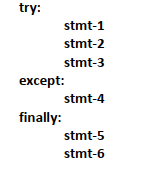

* **`Case-1:`** If there is no exception → `1`,`2`,`3`,`5`,`6` **Normal Termination**
* **`Case-2:`** If an exception is raised at `stmt-2` and the corresponding except block matched → `1`,`4`,`5`,`6` **Normal Termination**
* **`Case-3:`** If an exception is raised at `stmt-2` but the corresponding except block is not matched → `1`,`5` **Abnormal Termination**
* **`Case-4:`** If an exception is raised at `stmt-4` then it is always **abnormal termination** but before that `finally` block will be executed.
* **`Case-5:`** If an exception is raised at `stmt-5` or at `stmt-6` then it is always **abnormal termination**.

# Nested try-except-finally blocks

* We can take `try-except-finally` blocks inside `try` or `except` or `finally` blocks
* That is, nesting of `try-except-finally` is possible. 
* General **Risky code** we have to take inside the **outer `try`** block and too much risky code we have to take inside the **inner `try`** block. 
* Inside the **Inner `try`** block if an exception is raised then the **inner `except`** block is responsible to handle. 
* If it is unable to handle then the **outer `except`** block is responsible to handle. 

In [5]:
try:
  print("outer try block")
  try:
    print("Inner try block")
    print(10/0)
  except ZeroDivisionError:
    print("Inner except block")
  finally:
    print("Inner finally block")
except:
  print("outer except block")
finally:
  print("outer finally block")

outer try block
Inner try block
Inner except block
Inner finally block
outer finally block


In [6]:
try:
  print("outer try block")
  print(10/0) # Exception Occur, Control goes to Outer except block.
  try:
    print("Inner try block")    
  except ZeroDivisionError:
    print("Inner except block")
  finally:
    print("Inner finally block")
except:                           # Control comes here!!.
  print("outer except block")
finally:
  print("outer finally block")

outer try block
outer except block
outer finally block


In this scenario, the **inner “`finally`”** block won’t get executed, because the **inner “`finally`”** block is responsible for the cleanup of resources associated with the **inner `try`** block. 

Since the **inner `try`** block didn’t get executed - no resource gets opened or used. 

Hence, there are no resources for cleanup, so the “`finally`” block is not required to be executed.

**NOTE:**
* In a **`try-except-finally`** block, if the control does not enter into the `try` block then the corresponding **“`finally`”** block won’t be executed.
* Once control is entered in the `try` block then compulsory the **“`finally`”** block will be executed.

# Control Flow in nested try-except-finally

```
try:
  stmt-1
  stmt-2
  stmt-3
  try:
    stmt-4
    stmt-5
    stmt-6
  except X:
    stmt-7
  finally:
    stmt-8
  stmt-9
except Y:
  stmt-10
finally:
  stmt-11
stmt-12
```

* **Case-1:** If there is no exception → `1`, `2`, `3`, `4`, `5`, `6`, `8`, `9`, `11`, `12` (**Normal Termination**)
* **Case-2:** If an exception is raised at `stmt-2` and the corresponding except block matched `1`, `10`, `11`, `12` (**Normal Termination**)
* **Case-3:** If an exception is raised at `stmt-2` and the corresponding except block is not matched `1`, `11` (**Abnormal Termination**)
* **Case-4:** If an exception is raised at `stmt-5` and inner except block matched `1`, `2`, `3`, `4`, `7`, `8`, `9`, `11`, `12` (**Normal Termination**)
* **Case-5:** If an exception is raised at `stmt-5` and the inner except block is not matched but the outer except block matched `1`, `2`, `3`, `4`, `8`, `10`, `11`, `12` (**Normal Termination**)
* **Case-6:** If an exception is raised at `stmt-5` and both inner and outer except blocks are not matched `1`, `2`, `3`, `4`, `8`, `11` (**Abnormal Termination**)
* **Case-7:** If an exception is raised at `stmt-7` and corresponding except block matched `1`, `2`, `3`, (`4`/`5`/`6` - exception), `8`, `10`,`11`,`12` (**Normal Termination**)
* **Case-8:** If an exception is raised at `stmt-7` and corresponding except block not matched `1`, `2`, `3`, (`4`/`5`/`6` - exception), `8`, `11` (**Abnormal Termination**)
* **Case-9:** If an exception is raised at `stmt-8` and corresponding except block matched `1`, `2`, `3`, (`4`/`5`/`6`/`7` - may or may not execute), `10`, `11`, `12` (**Normal Termination**)
* **Case-10:** If an exception is raised at `stmt-8` and corresponding except block, not matched `1`, `2`, `3`, (`4`/`5`/`6`/`7` - may or may not execute), `11` (**Abnormal Termination**)
* **Case-11:** If an exception is raised at `stmt-9` and corresponding except block matched `1`, `2`, `3`, (`4`/`5`/`6`/`7` - may or may not execute), `8`, `10`, `11`, `12` (**Normal Termination**)
* **Case-12:** If an exception is raised at `stmt-9` and corresponding except block, not matched `1`, `2`, `3`, (`4`/`5`/`6`/`7` - may or may not execute), `8`, `11` (**Abnormal Termination**)
* **Case-13:** If an exception is raised at `stmt-10` then it is always **abnormal termination** but before abnormal termination **`finally`** block `stmt-11` will be executed.
* **Case-14:** If an exception is raised at `stmt-11` or `stmt-12` then it is always **abnormal termination**.


> **Note:**
> * *If the control entered into the `try` block then compulsory the **“`finally`”** block will be executed.*
> * *If the control is not entered into the `try` block then `finally` block won't be executed.*

# else Block with try-except-finally

* We can use the `else` block with `ry-except-finally` blocks.
* The else block will be executed if and only if there are no exceptions inside the `try` block.

In [8]:
try:
  # Risky Code
    pass
except:
  # will be executed if exception inside try
    pass
else:
  # will be executed if there is no exception inside try
    pass
finally:
    pass
  # will be executed whether exception 
  # raised or not raised 
  # handled or not handled

In [9]:
try:
  print("try")
  print(10/0) # line-1
except:
  print("except")
else:
  print("else")
finally:
  print("finally")

try
except
finally


If we comment **line-1** then the `else` block will be executed because there is no exception inside try. 

In this case, the output is:
* `try`
* `else`
* `finally`

If we are not commenting on **line-1** then the else block won't be executed because there is an exception inside the `try` block. 

In this case, the output is:
* `try`
* `except`
* `finally`

**else block use case**

In [10]:
f = None
try:
  f = open("abc.txt", "r")
except:
  print("some problem while locating and opening the file")
else:
  print("file opened successfully")
  print("data present in file is:")
  print("#"*30)
  print(f.read())
finally:
  if f is not None:
    f.close()

some problem while locating and opening the file


**Which of the following statement is true for the else block?**

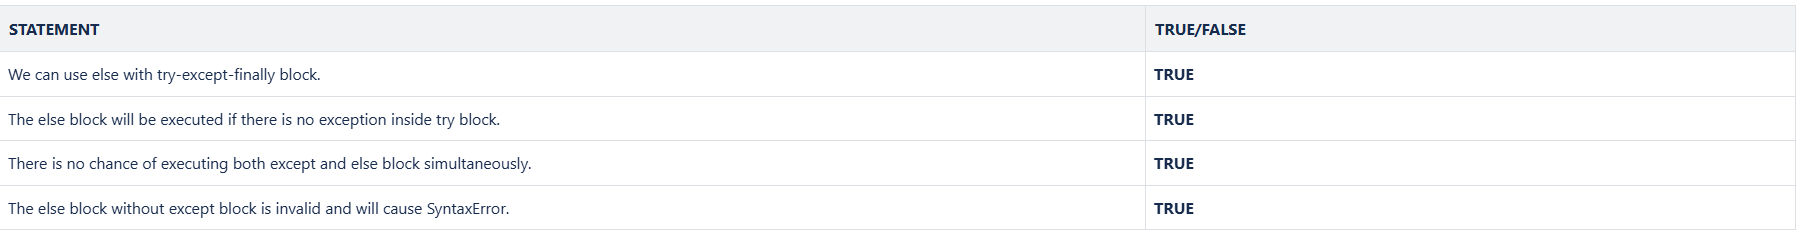

# Various possible combinations of try-except-else-finally

* Whenever we are writing **`try` block**, it is **compulsory** that we should write **`except` or `finally` block**. That is, **without `except` or `finally` block** we cannot write **`try` block**.

* Whenever we are writing **`except` block**, **compulsory** we should write **`try` block**. That is, **`except` without `try`** is always **invalid**.

* Whenever we are writing the **“`finally`” block**, **compulsory** we should write **`try` block**. That is, **`finally` without a `try` block** is always **invalid**.

* We can write **multiple `except` blocks** for the **same `try` block**, but we cannot write **multiple “`finally`” blocks** for the **same `try` block**.

* Whenever we are writing **`else` block** is **compulsory `except` block** should be there. That is, **without `except` block**, we cannot write **`else` block**.

* In **`try-except-else-finally`** order is important.

* We can define **`try-except-else-finally`** inside `try`, `except`, `else`, and `finally` blocks. That is, nesting of **`try-except-else-finally`** is always possible.

# Examples of Valid & Invalid Combinations

In [12]:
try:
    print("try") 

SyntaxError: incomplete input (2074812769.py, line 2)

In [14]:
except:
  print("Hello")

SyntaxError: invalid syntax (2081928219.py, line 1)

In [15]:
else:
  print("Hello")

SyntaxError: invalid syntax (1136236041.py, line 1)

In [16]:
finally:
  print("Hello") 

SyntaxError: invalid syntax (1816030731.py, line 1)

In [17]:
try:
  print("try")
except:
  print("except")

try


In [18]:
try:
  print("try")
finally:
  print("finally")

try
finally


In [19]:
try:
  print("try")
except:
  print("except")
else:
  print("else")

try
else


In [20]:
try:
  print("try")
else:
  print("else")

SyntaxError: expected 'except' or 'finally' block (1899627489.py, line 3)

In [21]:
try:
  print("try")
else:
  print("else")
finally:
  print("finally")

SyntaxError: expected 'except' or 'finally' block (2356510954.py, line 3)

In [22]:
try:
  print("try")
except XXX:
  print("except-1")
except YYY:
  print("except-2")

try


In [24]:
try:
  print("try")
except :
  print("except-1")
else:
  print("else")
else:
  print("else")

SyntaxError: invalid syntax (3187609636.py, line 7)

In [25]:
try:
  print("try")
except :
  print("except-1")
finally:
  print("finally")
finally:
  print("finally")

SyntaxError: invalid syntax (3481879437.py, line 7)

In [26]:
try:
  print("try")
print("Hello")
except:
  print("except")

SyntaxError: expected 'except' or 'finally' block (2465159795.py, line 3)

In [27]:
try:
  print("try")
except:
  print("except")
print("Hello")
except:
  print("except")

SyntaxError: invalid syntax (2313983943.py, line 6)

In [28]:
try:
  print("try")
except:
  print("except")
print("Hello")
finally:
  print("finally")

SyntaxError: invalid syntax (4005463591.py, line 6)

In [29]:
try:
  print("try")
except:
  print("except")
print("Hello")
else:
  print("else")

SyntaxError: invalid syntax (1721097707.py, line 6)

In [30]:
try:
  print("try")
except:
  print("except")
try:
  print("try")
except:
  print("except")

try
try


In [31]:
try:
  print("try")
except:
  print("except")
try:
  print("try")
finally:
  print("finally")

try
try
finally


In [32]:
try:
  print("try")
except:
  print("except")
if 10>20:
  print("if")
else:
  print("else")

try
else


In [33]:
try:
  print("try")
  try:
    print("inner try")
  except:
    print("inner except block")
  finally:
    print("inner finally block")
except:
  print("except")

try
inner try
inner finally block


In [34]:
try:
  print("try")
except:
  print("except")
  try:
    print("inner try")
  except:
    print("inner except block")
  finally:
    print("inner finally block")

try


In [35]:
try:
  print("try")
except:
  print("except")
finally:
  try:
    print("inner try")
  except:
    print("inner except block")
  finally:
    print("inner finally block")

try
inner try
inner finally block


In [36]:
try:
  print("try")
except:
  print("except")
try:
  print("try")
else:
  print("else")

SyntaxError: expected 'except' or 'finally' block (2892657720.py, line 7)

In [37]:
try:
  print("try")
    try:
      print("inner try")
except:
  print("except")

IndentationError: unexpected indent (970003176.py, line 3)

In [38]:
try:
  print("try")
else:
  print("else")
except:
  print("except")
finally:
  print("finally")

SyntaxError: expected 'except' or 'finally' block (3409961243.py, line 3)